<a href="https://colab.research.google.com/github/nickraisgit/NishankMLRepo/blob/main/AvgYardsOverExpected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Creating Average Yards Over Expected(YOE) and using it to look at how good each offense is**

For this project I am using the nflfastr dataset and using down, yardline, yards to go, time remaining, and score differential as features for this model. We will create a data point called Yards Over Expected by predicting the amount of yards a team would get based on those features using a simple Deep Learning model. We will use this data point to compare it with the amount of yards gained, creating a final point of Yards Over Expected. This will show how good an offense is compared to league average. I am using data from the past 3 years to train this model. 


In [136]:
import pandas as pd

In [137]:
YEAR = 2021

In [138]:
data1 = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
                         'play_by_play_' + str(YEAR) + '.csv.gz?raw=True',
                         compression='gzip', low_memory=False)

In [139]:
data1.shape

(19347, 372)

In [154]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, Normalization

In [142]:
df_features = data1[['posteam','game_seconds_remaining', 'down', 'yardline_100', 'yards_gained', 'score_differential_post', 'ydstogo']]

In [143]:
df_features.head()

,posteam,game_seconds_remaining,down,yardline_100,yards_gained,score_differential_post,ydstogo
0,NaN,3600.0,NaN,NaN,NaN,NaN,0
1,TEN,3600.0,NaN,35.0,0.0,0.0,0
2,TEN,3600.0,1.0,75.0,-3.0,0.0,10
3,TEN,3563.0,2.0,78.0,3.0,0.0,13
4,TEN,3522.0,3.0,75.0,0.0,0.0,10


In [144]:
x_test = df_features[df_features.down.notnull()]

In [145]:
x_test = x_test[df_features.yards_gained.notnull()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [146]:
y_test = x_test['yards_gained']

In [147]:
x_test = x_test[['posteam','game_seconds_remaining', 'down', 'yardline_100', 'score_differential_post', 'ydstogo']]

In [148]:
y_test

2        -3.0
3         3.0
4         0.0
5         0.0
6        38.0
         ... 
19340     9.0
19341     1.0
19342     3.0
19344     0.0
19345    -1.0
Name: yards_gained, Length: 15944, dtype: float64

In [149]:
y_test = pd.DataFrame(y_test)

In [150]:
y_test

,yards_gained
2,-3.0
3,3.0
4,0.0
5,0.0
6,38.0
...,...
19340,9.0
19341,1.0
19342,3.0
19344,0.0


In [151]:
y_test = y_test.values

In [152]:
y_test

array([[-3.],
       [ 3.],
       [ 0.],
       ...,
       [ 3.],
       [ 0.],
       [-1.]])

In [153]:
YEARS = [2018,2019,2020]
data = pd.DataFrame()
for i in YEARS:  
    i_data = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
                         'play_by_play_' + str(i) + '.csv.gz?raw=True',
                         compression='gzip', low_memory=False)

    data = data.append(i_data, sort=True)

In [156]:
data.head()

,aborted_play,air_epa,air_wpa,air_yards,assist_tackle,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,assist_tackle_4_team,away_coach,away_score,away_team,away_timeouts_remaining,away_wp,away_wp_post,blocked_player_id,blocked_player_name,comp_air_epa,comp_air_wpa,comp_yac_epa,comp_yac_wpa,complete_pass,cp,cpoe,def_wp,defensive_extra_point_attempt,defensive_extra_point_conv,defensive_two_point_attempt,defensive_two_point_conv,defteam,defteam_score,defteam_score_post,...,total_home_comp_yac_wpa,total_home_epa,total_home_pass_epa,total_home_pass_wpa,total_home_raw_air_epa,total_home_raw_air_wpa,total_home_raw_yac_epa,total_home_raw_yac_wpa,total_home_rush_epa,total_home_rush_wpa,total_home_score,total_line,touchback,touchdown,two_point_attempt,two_point_conv_result,two_point_conversion_prob,vegas_home_wp,vegas_home_wpa,vegas_wp,vegas_wpa,weather,week,wind,wp,wpa,xpass,xyac_epa,xyac_fd,xyac_mean_yardage,xyac_median_yardage,xyac_success,yac_epa,yac_wpa,yardline_100,yards_after_catch,yards_gained,ydsnet,ydstogo,yrdln
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dan Quinn,12,ATL,3,0.433208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.566792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0,44.5,0,NaN,NaN,NaN,0.0,0.512549,0.000000,0.487451,-0.000000,"Cloudy Temp: 81° F, Humidity: 71%, Wind: NNW 8...",1,8.0,0.433208,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,PHI 35
1,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dan Quinn,12,ATL,3,0.433208,0.433208,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.0,NaN,NaN,0.566792,0.0,0.0,0.0,0.0,PHI,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0,44.5,1,0.0,0.0,NaN,0.0,0.512549,0.000000,0.487451,-0.000000,"Cloudy Temp: 81° F, Humidity: 71%, Wind: NNW 8...",1,8.0,0.433208,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,0.0,73.0,0,PHI 35
2,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dan Quinn,12,ATL,3,0.433208,0.410890,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.0,NaN,NaN,0.566792,0.0,0.0,0.0,0.0,PHI,0.0,0.0,...,0.000000,0.773778,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0,44.5,0,0.0,0.0,NaN,0.0,0.512549,0.035972,0.487451,-0.035972,"Cloudy Temp: 81° F, Humidity: 71%, Wind: NNW 8...",1,8.0,0.433208,-0.022318,0.479781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,NaN,0.0,73.0,10,ATL 25
3,0,0.321212,0.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dan Quinn,12,ATL,3,0.410890,0.420756,NaN,NaN,0.321212,0.0,0.528906,0.009866,1.0,0.713305,28.669465,0.589110,0.0,0.0,0.0,0.0,PHI,0.0,0.0,...,-0.009866,-0.076340,-0.850118,-0.009866,-0.321212,0.0,-0.528906,-0.009866,0.000000,0.000000,0,44.5,0,0.0,0.0,NaN,0.0,0.548521,-0.019719,0.451479,0.019719,"Cloudy Temp: 81° F, Humidity: 71%, Wind: NNW 8...",1,8.0,0.410890,0.009866,0.587117,0.564953,0.147457,3.515878,2.0,0.998706,0.528906,0.009866,80.0,2.0,10.0,73.0,15,ATL 20
4,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dan Quinn,12,ATL,3,0.420756,0.454899,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.0,NaN,NaN,0.579244,0.0,0.0,0.0,0.0,PHI,0.0,0.0,...,-0.009866,-1.082063,-0.850118,-0.009866,-0.321212,0.0,-0.528906,-0.009866,-1.005722,-0.034143,0,44.5,0,0.0,0.0,NaN,0.0,0.528802,-0.038261,0.471198,0.038261,"Cloudy Temp: 81° F, Humidity: 71%, Wind: NNW 8...",1,8.0,0.420756,0.034143,0.498259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,11.0,73.0,5,ATL 30


In [157]:
x_train_feats = data[['posteam','game_seconds_remaining', 'down', 'yardline_100', 'yards_gained', 'ydstogo', 'score_differential_post']]

In [158]:
x_train_feats = x_train_feats[x_train_feats.down.notnull()]

In [159]:
x_train_feats = x_train_feats[x_train_feats.yards_gained.notnull()]

In [160]:
x_train_feats.shape

(119068, 7)

In [161]:
x_train_feats

,posteam,game_seconds_remaining,down,yardline_100,yards_gained,ydstogo,score_differential_post
2,ATL,3600.0,1.0,75.0,0.0,10,0.0
3,ATL,3600.0,1.0,80.0,10.0,15,0.0
4,ATL,3562.0,2.0,70.0,11.0,5,0.0
5,ATL,3526.0,1.0,59.0,20.0,10,0.0
6,ATL,3490.0,1.0,39.0,0.0,10,0.0
...,...,...,...,...,...,...,...
48508,KC,120.0,1.0,14.0,4.0,10,-22.0
48509,KC,100.0,2.0,10.0,0.0,6,-22.0
48510,TB,93.0,1.0,80.0,-1.0,10,22.0
48511,TB,50.0,2.0,81.0,0.0,11,22.0


In [162]:
y_train = x_train_feats[['yards_gained']]

In [163]:
y_train

,yards_gained
2,0.0
3,10.0
4,11.0
5,20.0
6,0.0
...,...
48508,4.0
48509,0.0
48510,-1.0
48511,0.0


In [164]:
y_train = y_train.values

In [165]:
y_train

array([[ 0.],
       [10.],
       [11.],
       ...,
       [-1.],
       [ 0.],
       [-1.]])

In [166]:
x_train = x_train_feats[['posteam','game_seconds_remaining', 'down', 'yardline_100', 'score_differential_post', 'ydstogo']]

In [167]:
x_final_train = x_train[['game_seconds_remaining', 'down', 'yardline_100', 'score_differential_post', 'ydstogo']].values

In [168]:
x_final_test = x_test[['game_seconds_remaining', 'down', 'yardline_100', 'score_differential_post', 'ydstogo']].values

In [169]:
x_final_train.shape

(119068, 5)

In [170]:
x_final_train

array([[3.600e+03, 1.000e+00, 7.500e+01, 0.000e+00, 1.000e+01],
       [3.600e+03, 1.000e+00, 8.000e+01, 0.000e+00, 1.500e+01],
       [3.562e+03, 2.000e+00, 7.000e+01, 0.000e+00, 5.000e+00],
       ...,
       [9.300e+01, 1.000e+00, 8.000e+01, 2.200e+01, 1.000e+01],
       [5.000e+01, 2.000e+00, 8.100e+01, 2.200e+01, 1.100e+01],
       [3.000e+01, 3.000e+00, 8.100e+01, 2.200e+01, 1.100e+01]])

In [177]:
x_train_final = tf.keras.utils.normalize(x_final_train)

In [178]:
x_train_final

array([[9.99779163e-01, 2.77716434e-04, 2.08287326e-02, 0.00000000e+00,
        2.77716434e-03],
       [9.99744465e-01, 2.77706796e-04, 2.22165437e-02, 0.00000000e+00,
        4.16560194e-03],
       [9.99805816e-01, 5.61373282e-04, 1.96480649e-02, 0.00000000e+00,
        1.40343321e-03],
       ...,
       [7.43785821e-01, 7.99769699e-03, 6.39815760e-01, 1.75949334e-01,
        7.99769699e-02],
       [5.08459970e-01, 2.03383988e-02, 8.23705151e-01, 2.23722387e-01,
        1.11861193e-01],
       [3.33848930e-01, 3.33848930e-02, 9.01392112e-01, 2.44822549e-01,
        1.22411274e-01]])

In [179]:
x_final_test

array([[ 3.600e+03,  1.000e+00,  7.500e+01,  0.000e+00,  1.000e+01],
       [ 3.563e+03,  2.000e+00,  7.800e+01,  0.000e+00,  1.300e+01],
       [ 3.522e+03,  3.000e+00,  7.500e+01,  0.000e+00,  1.000e+01],
       ...,
       [ 2.100e+01,  1.000e+00,  8.000e+00, -3.000e+00,  8.000e+00],
       [ 1.500e+01,  2.000e+00,  5.000e+00, -3.000e+00,  5.000e+00],
       [ 1.200e+01,  1.000e+00,  8.000e+01,  3.000e+00,  1.000e+01]])

In [180]:
x_test_final = tf.keras.utils.normalize(x_final_test)

In [181]:
x_test_final

array([[ 9.99779163e-01,  2.77716434e-04,  2.08287326e-02,
         0.00000000e+00,  2.77716434e-03],
       [ 9.99753655e-01,  5.61186447e-04,  2.18862714e-02,
         0.00000000e+00,  3.64771190e-03],
       [ 9.99768954e-01,  8.51591954e-04,  2.12897989e-02,
         0.00000000e+00,  2.83863985e-03],
       ...,
       [ 8.72730217e-01,  4.15585817e-02,  3.32468654e-01,
        -1.24675745e-01,  3.32468654e-01],
       [ 8.83883476e-01,  1.17851130e-01,  2.94627825e-01,
        -1.76776695e-01,  2.94627825e-01],
       [ 1.47109205e-01,  1.22591004e-02,  9.80728032e-01,
         3.67773012e-02,  1.22591004e-01]])

In [182]:
x_final_train

array([[3.600e+03, 1.000e+00, 7.500e+01, 0.000e+00, 1.000e+01],
       [3.600e+03, 1.000e+00, 8.000e+01, 0.000e+00, 1.500e+01],
       [3.562e+03, 2.000e+00, 7.000e+01, 0.000e+00, 5.000e+00],
       ...,
       [9.300e+01, 1.000e+00, 8.000e+01, 2.200e+01, 1.000e+01],
       [5.000e+01, 2.000e+00, 8.100e+01, 2.200e+01, 1.100e+01],
       [3.000e+01, 3.000e+00, 8.100e+01, 2.200e+01, 1.100e+01]])

In [183]:
y_train

array([[ 0.],
       [10.],
       [11.],
       ...,
       [-1.],
       [ 0.],
       [-1.]])

In [184]:
x_final_test[0].shape

(5,)

In [185]:
x_final_train[0]

array([3.6e+03, 1.0e+00, 7.5e+01, 0.0e+00, 1.0e+01])

In [186]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape = x_final_train[0].shape))
model.add(Dense(1, activation = 'linear'))

In [187]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               768       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


In [188]:

model.compile(optimizer = 'rmsprop' , loss = 'mse')
r = model.fit(x_train_final, y_train, batch_size=256, epochs=30)

Epoch 1/30
466/466 [==============================] - 2s 3ms/step - loss: 72.3826
Epoch 2/30
466/466 [==============================] - 1s 3ms/step - loss: 69.8534
Epoch 3/30
466/466 [==============================] - 1s 3ms/step - loss: 69.7176
Epoch 4/30
466/466 [==============================] - 1s 3ms/step - loss: 69.6155
Epoch 5/30
466/466 [==============================] - 1s 3ms/step - loss: 69.5672
Epoch 6/30
466/466 [==============================] - 1s 3ms/step - loss: 69.5184
Epoch 7/30
466/466 [==============================] - 1s 3ms/step - loss: 69.4786
Epoch 8/30
466/466 [==============================] - 1s 3ms/step - loss: 69.4309
Epoch 9/30
466/466 [==============================] - 2s 3ms/step - loss: 69.3980
Epoch 10/30
466/466 [==============================] - 1s 3ms/step - loss: 69.3449
Epoch 11/30
466/466 [==============================] - 1s 3ms/step - loss: 69.3062
Epoch 12/30
466/466 [==============================] - 1s 3ms/step - loss: 69.2688
Epoch 13/30
4

In [189]:
test_preds = model.predict(x_test_final)

In [190]:
x_test['Expected_yards'] = test_preds

In [191]:
x_test

,posteam,game_seconds_remaining,down,yardline_100,score_differential_post,ydstogo,Expected_yards
2,TEN,3600.0,1.0,75.0,0.0,10,4.977369
3,TEN,3563.0,2.0,78.0,0.0,13,4.961930
4,TEN,3522.0,3.0,75.0,0.0,10,4.923436
5,TEN,3519.0,4.0,75.0,0.0,10,4.891855
6,ARI,3507.0,1.0,61.0,0.0,10,4.896706
...,...,...,...,...,...,...,...
19340,ARI,49.0,1.0,18.0,-3.0,10,3.850605
19341,ARI,44.0,2.0,9.0,-3.0,1,2.902407
19342,ARI,21.0,1.0,8.0,-3.0,8,2.538756
19344,ARI,15.0,2.0,5.0,-3.0,5,1.040823


In [192]:
x_test['yards_gained'] = y_test

In [193]:
x_test

,posteam,game_seconds_remaining,down,yardline_100,score_differential_post,ydstogo,Expected_yards,yards_gained
2,TEN,3600.0,1.0,75.0,0.0,10,4.977369,-3.0
3,TEN,3563.0,2.0,78.0,0.0,13,4.961930,3.0
4,TEN,3522.0,3.0,75.0,0.0,10,4.923436,0.0
5,TEN,3519.0,4.0,75.0,0.0,10,4.891855,0.0
6,ARI,3507.0,1.0,61.0,0.0,10,4.896706,38.0
...,...,...,...,...,...,...,...,...
19340,ARI,49.0,1.0,18.0,-3.0,10,3.850605,9.0
19341,ARI,44.0,2.0,9.0,-3.0,1,2.902407,1.0
19342,ARI,21.0,1.0,8.0,-3.0,8,2.538756,3.0
19344,ARI,15.0,2.0,5.0,-3.0,5,1.040823,0.0


In [194]:
avg_df = x_test.groupby('posteam').mean()

In [195]:
avg_df

,game_seconds_remaining,down,yardline_100,score_differential_post,ydstogo,Expected_yards,yards_gained
posteam,,,,,,,
ARI,1784.654424,1.916528,48.400668,5.826377,8.654424,4.473435,5.257095
ATL,1776.620985,1.995717,51.025696,-2.104925,8.340471,4.616735,4.550321
BAL,1679.985047,1.936449,52.136449,0.437383,8.614953,4.667213,5.463551
BUF,1781.949260,1.938689,45.560254,8.395349,8.245243,4.433446,5.219873
CAR,1741.091892,2.018018,53.007207,1.609009,8.589189,4.636477,4.136937
CHI,1768.854430,2.000000,53.033755,-3.582278,8.761603,4.651173,3.772152
CIN,1637.077244,2.008351,54.246347,2.079332,8.106472,4.636120,5.400835
CLE,1791.841085,1.959302,47.612403,0.850775,8.486434,4.542249,5.337209
DAL,1862.094070,1.899796,46.390593,2.047035,8.384458,4.467374,5.654397


In [196]:
avg_df['yards_over_expected'] = avg_df['yards_gained'].values - avg_df['Expected_yards'].values

In [197]:
avg_df

,game_seconds_remaining,down,yardline_100,score_differential_post,ydstogo,Expected_yards,yards_gained,yards_over_expected
posteam,,,,,,,,
ARI,1784.654424,1.916528,48.400668,5.826377,8.654424,4.473435,5.257095,0.783660
ATL,1776.620985,1.995717,51.025696,-2.104925,8.340471,4.616735,4.550321,-0.066414
BAL,1679.985047,1.936449,52.136449,0.437383,8.614953,4.667213,5.463551,0.796338
BUF,1781.949260,1.938689,45.560254,8.395349,8.245243,4.433446,5.219873,0.786427
CAR,1741.091892,2.018018,53.007207,1.609009,8.589189,4.636477,4.136937,-0.499540
CHI,1768.854430,2.000000,53.033755,-3.582278,8.761603,4.651173,3.772152,-0.879021
CIN,1637.077244,2.008351,54.246347,2.079332,8.106472,4.636120,5.400835,0.764715
CLE,1791.841085,1.959302,47.612403,0.850775,8.486434,4.542249,5.337209,0.794960
DAL,1862.094070,1.899796,46.390593,2.047035,8.384458,4.467374,5.654397,1.187022


In [198]:
avg_df.sort_values(by = ['yards_over_expected'])

,game_seconds_remaining,down,yardline_100,score_differential_post,ydstogo,Expected_yards,yards_gained,yards_over_expected
posteam,,,,,,,,
CHI,1768.854430,2.000000,53.033755,-3.582278,8.761603,4.651173,3.772152,-0.879021
NYJ,1607.524390,2.034146,56.231707,-11.731707,8.517073,4.794916,3.985366,-0.809550
HOU,1833.192149,2.088843,55.526860,-3.940083,8.462810,4.729928,3.979339,-0.750589
CAR,1741.091892,2.018018,53.007207,1.609009,8.589189,4.636477,4.136937,-0.499540
PIT,1713.266816,2.017937,54.773543,-2.905830,8.529148,4.739098,4.356502,-0.382596
MIA,1799.909627,2.017682,51.005894,-5.280943,8.200393,4.565554,4.229862,-0.335692
DET,1704.913534,2.000000,49.941729,-8.849624,8.631579,4.670346,4.400376,-0.269970
NO,1804.106796,2.026699,51.548544,1.907767,8.347087,4.589495,4.320388,-0.269107
ATL,1776.620985,1.995717,51.025696,-2.104925,8.340471,4.616735,4.550321,-0.066414


In [199]:
final_df = avg_df.sort_values(['yards_over_expected'], ascending=False)

In [200]:
final_df

,game_seconds_remaining,down,yardline_100,score_differential_post,ydstogo,Expected_yards,yards_gained,yards_over_expected
posteam,,,,,,,,
LA,1734.505176,1.915114,47.403727,2.834369,8.140787,4.443658,5.755694,1.312035
DAL,1862.094070,1.899796,46.390593,2.047035,8.384458,4.467374,5.654397,1.187022
TB,1758.108893,1.896552,45.985481,5.655172,8.234120,4.435168,5.379310,0.944142
KC,1685.977486,1.823640,49.302064,-5.309568,8.602251,4.653542,5.506567,0.853025
BAL,1679.985047,1.936449,52.136449,0.437383,8.614953,4.667213,5.463551,0.796338
CLE,1791.841085,1.959302,47.612403,0.850775,8.486434,4.542249,5.337209,0.794960
BUF,1781.949260,1.938689,45.560254,8.395349,8.245243,4.433446,5.219873,0.786427
ARI,1784.654424,1.916528,48.400668,5.826377,8.654424,4.473435,5.257095,0.783660
CIN,1637.077244,2.008351,54.246347,2.079332,8.106472,4.636120,5.400835,0.764715


In [265]:
epa_data1 = data1[data1.down.notnull()]
epa_data = epa_data1[epa_data1.yards_gained.notnull()]
epa_data1 = epa_data1.groupby('posteam').mean()
avg_df['mean_epa'] = epa_data1['epa'].values
epa_data1['Expected_yards'] = avg_df['Expected_yards'].values
epa_data1['mean_epa'] = avg_df['mean_epa'].values
epa_data1['yards_over_expected'] = avg_df['yards_over_expected'].values
epa_data1

,play_id,old_game_id,week,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,down,goal_to_go,ydstogo,ydsnet,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,air_yards,yards_after_catch,kick_distance,home_timeouts_remaining,away_timeouts_remaining,timeout,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,...,drive_inside20,drive_ended_with_score,drive_quarter_start,drive_quarter_end,drive_yards_penalized,drive_play_id_started,drive_play_id_ended,away_score,home_score,result,total,spread_line,total_line,div_game,temp,wind,aborted_play,success,passer_jersey_number,rusher_jersey_number,receiver_jersey_number,pass,rush,first_down,special,play,jersey_number,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe,Expected_yards,mean_epa,yards_over_expected
posteam,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ARI,2124.036667,2.021098e+09,4.455000,48.388333,451.391667,839.891667,1781.891667,0.0,11.571667,0.073333,2.521667,1.920000,0.101667,8.651667,48.000000,5.257095,0.833333,0.290000,0.480801,0.016667,0.000000,0.025000,8.160156,5.591398,46.461538,2.595000,2.171667,0.000000,2.258333,2.508333,10.635000,14.486667,15.140000,9.608333,5.531667,15.490000,9.631667,5.858333,0.121550,0.085563,...,0.588333,0.621667,2.470000,2.561667,-0.278333,2012.873333,2243.896667,27.271667,20.966667,-6.305000,48.238333,4.739167,50.587500,0.255000,NaN,NaN,0.010000,0.475000,1.000000,4.933333,19.405405,0.506667,0.376667,0.305509,0.070000,0.911667,2.784499,0.130000,0.666667,0.103426,0.683783,5.767401,4.066964,0.765685,0.575296,0.565019,1.084968,4.473435,0.095999,0.783660
ATL,2099.451820,2.021097e+09,3.601713,51.025696,410.239829,843.858672,1776.620985,0.0,10.546039,0.057816,2.481799,1.995717,0.068522,8.340471,43.993576,4.550321,0.477516,0.117773,0.554604,0.006424,0.002141,0.008565,6.781377,4.234940,39.242424,2.653105,2.670236,0.002141,2.723769,2.599572,12.595289,10.173448,10.074946,12.411135,-2.336188,10.331906,12.436831,-2.104925,0.121726,0.094242,...,0.471092,0.526767,2.445396,2.573876,1.475375,1980.800857,2218.256959,26.518201,25.531049,-0.987152,52.049251,3.489293,48.399358,0.169165,NaN,NaN,0.004283,0.428266,2.400000,48.144828,33.258824,0.588865,0.301927,0.267666,0.074946,0.916488,18.348558,0.094218,0.852248,-0.015484,0.732579,5.194112,3.403509,0.769104,0.567537,0.648640,1.136663,4.616735,-0.026289,-0.066414
BAL,2124.622430,2.021097e+09,4.039252,52.136449,414.938318,818.676636,1679.985047,0.0,12.493458,0.067290,2.622430,1.936449,0.042991,8.614953,42.330841,5.463551,0.865421,0.044860,0.530841,0.007477,0.003738,0.057944,10.676596,4.807947,44.707317,2.542056,2.633645,0.001869,2.568224,2.607477,10.128972,13.646729,11.792523,11.657944,0.134579,12.106542,11.669159,0.437383,0.136749,0.091842,...,0.377570,0.523364,2.581308,2.697196,-2.057944,2029.022430,2224.676636,25.540187,24.732710,-0.807477,50.272897,0.773832,48.631776,0.153271,NaN,NaN,0.001869,0.482243,7.773973,21.203704,35.733906,0.545794,0.345794,0.302804,0.080374,0.908411,13.840671,0.102804,0.710280,0.053579,0.620441,5.299580,3.115942,0.832696,0.629898,0.615655,0.166261,4.667213,0.053579,0.796338
BUF,2132.443038,2.021096e+09,3.411392,45.624473,412.149789,839.364979,1781.137131,0.0,12.588608,0.078059,2.478903,1.938819,0.094937,8.246835,47.059072,5.219873,0.647679,0.160338,0.540084,0.021097,0.000000,0.037975,9.293103,3.966887,36.379310,2.710970,2.672996,0.002114,2.719409,2.664557,11.664557,10.883966,15.118143,7.050633,8.067511,15.485232,7.063291,8.421941,0.121501,0.080644,...,0.535865,0.628692,2.424051,2.542194,0.301688,2023.050633,2248.662447,24.073840,26.044304,1.970464,50.118143,4.496835,49.628692,0.151899,NaN,NaN,0.002110,0.470464,16.921348,21.810345,22.

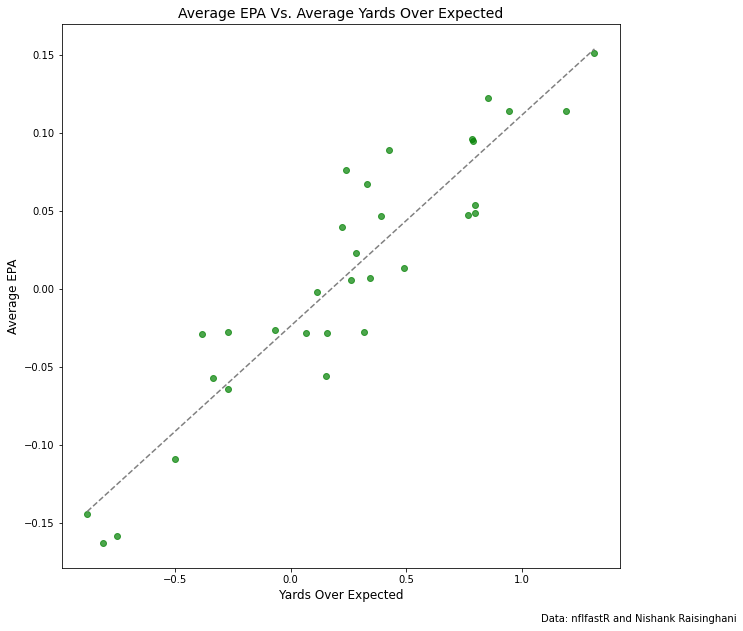

In [204]:
import matplotlib.pyplot as plt
x = avg_df['yards_over_expected'].values
y = avg_df['mean_epa'].values
plt.figure(figsize=(10,10))


plt.scatter(x, y, alpha=.7, color='green')


plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), 
         color='grey', linestyle='--')
plt.xlabel('Yards Over Expected', fontsize=12)
plt.ylabel('Average EPA', fontsize=12)
plt.title('Average EPA Vs. Average Yards Over Expected',fontsize=14)

plt.figtext(.79, .05, 'Data: nflfastR and Nishank Raisinghani', fontsize=10)


plt.savefig('epavsyoe.png', dpi=400)

In [208]:
import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
urls = pd.read_csv('https://raw.githubusercontent.com/statsbylopez/BlogPosts/master/nfl_teamlogos.csv')

In [209]:
urls

,team,team_code,url
0,Arizona Cardinals,ARI,https://upload.wikimedia.org/wikipedia/en/thum...
1,Atlanta Falcons,ATL,https://upload.wikimedia.org/wikipedia/en/thum...
2,Baltimore Ravens,BAL,https://upload.wikimedia.org/wikipedia/en/thum...
3,Buffalo Bills,BUF,https://upload.wikimedia.org/wikipedia/en/thum...
4,Carolina Panthers,CAR,https://upload.wikimedia.org/wikipedia/en/thum...
5,Chicago Bears,CHI,https://upload.wikimedia.org/wikipedia/commons...
6,Cincinnati Bengals,CIN,https://upload.wikimedia.org/wikipedia/commons...
7,Cleveland Browns,CLE,https://upload.wikimedia.org/wikipedia/en/thum...
8,Dallas Cowboys,DAL,https://upload.wikimedia.org/wikipedia/commons...
9,Denver Broncos,DEN,https://upload.wikimedia.org/wikipedia/en/thum...


In [235]:
urls['team_code'].values

array(['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL',
       'DEN', 'DET', 'GB', 'HOU', 'IND', 'JAX', 'KC', 'LAC', 'LA', 'MIA',
       'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'LV', 'PHI', 'PIT', 'SF', 'SEA',
       'TB', 'TEN', 'WAS', 'OAK', 'STL', 'SD'], dtype=object)

In [255]:


for i in range(0,len(urls)):
    urllib.request.urlretrieve(urls['url'].iloc[i],os.getcwd() + '/' + urls['team_code'].iloc[i] + '.png')
def getImage(path): 
  return OffsetImage(plt.imread(path), zoom=.5)
logos = os.listdir(os.getcwd() + '/')

logo = []

for i in urls['team_code'].values:
    logo.append(os.getcwd() + '/' + i +'.png')

In [256]:
logo

['/content/ARI.png',
 '/content/ATL.png',
 '/content/BAL.png',
 '/content/BUF.png',
 '/content/CAR.png',
 '/content/CHI.png',
 '/content/CIN.png',
 '/content/CLE.png',
 '/content/DAL.png',
 '/content/DEN.png',
 '/content/DET.png',
 '/content/GB.png',
 '/content/HOU.png',
 '/content/IND.png',
 '/content/JAX.png',
 '/content/KC.png',
 '/content/LAC.png',
 '/content/LA.png',
 '/content/MIA.png',
 '/content/MIN.png',
 '/content/NE.png',
 '/content/NO.png',
 '/content/NYG.png',
 '/content/NYJ.png',
 '/content/LV.png',
 '/content/PHI.png',
 '/content/PIT.png',
 '/content/SF.png',
 '/content/SEA.png',
 '/content/TB.png',
 '/content/TEN.png',
 '/content/WAS.png',
 '/content/OAK.png',
 '/content/STL.png',
 '/content/SD.png']

In [259]:
logo.remove('/content/OAK.png')

In [260]:
logo

['/content/ARI.png',
 '/content/ATL.png',
 '/content/BAL.png',
 '/content/BUF.png',
 '/content/CAR.png',
 '/content/CHI.png',
 '/content/CIN.png',
 '/content/CLE.png',
 '/content/DAL.png',
 '/content/DEN.png',
 '/content/DET.png',
 '/content/GB.png',
 '/content/HOU.png',
 '/content/IND.png',
 '/content/JAX.png',
 '/content/KC.png',
 '/content/LAC.png',
 '/content/LA.png',
 '/content/MIA.png',
 '/content/MIN.png',
 '/content/NE.png',
 '/content/NO.png',
 '/content/NYG.png',
 '/content/NYJ.png',
 '/content/LV.png',
 '/content/PHI.png',
 '/content/PIT.png',
 '/content/SF.png',
 '/content/SEA.png',
 '/content/TB.png',
 '/content/TEN.png',
 '/content/WAS.png']

In [264]:
epa_data

,play_id,old_game_id,week,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,down,goal_to_go,ydstogo,ydsnet,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,air_yards,yards_after_catch,kick_distance,home_timeouts_remaining,away_timeouts_remaining,timeout,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,...,drive_yards_penalized,drive_play_id_started,drive_play_id_ended,away_score,home_score,result,total,spread_line,total_line,div_game,temp,wind,aborted_play,success,passer_jersey_number,rusher_jersey_number,receiver_jersey_number,pass,rush,first_down,special,play,jersey_number,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe,Expected_yards,mean_epa,yards_over_expected,color,path,path1,path2
posteam,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LA,2083.467909,2.021098e+09,4.128364,47.403727,424.567288,825.188406,1734.505176,0.0,10.830228,0.078675,2.544513,1.915114,0.051760,8.140787,51.824017,5.755694,0.573499,0.192547,0.527950,0.022774,0.000000,0.010352,9.246914,5.664671,39.656250,2.708075,2.482402,0.000000,2.770186,2.420290,10.478261,13.399586,12.977226,10.509317,2.467909,13.356108,10.521739,2.834369,0.112422,0.083013,...,0.890269,1969.627329,2197.571429,26.977226,23.488613,-3.488613,50.465839,1.845756,51.137681,0.308489,NaN,NaN,0.002070,0.488613,9.030189,24.654971,20.864000,0.548654,0.343685,0.316770,0.066253,0.910973,15.229698,0.113872,0.440994,0.150902,0.649403,5.280147,3.475113,0.837937,0.640687,0.555178,6.208595,4.443658,0.150902,1.312035,#97233F,/content/ARI.png,/content/ARI.png,/content/ARI.png
DAL,2064.304703,2.021096e+09,3.533742,46.390593,422.830266,886.633947,1862.094070,0.0,11.134969,0.071575,2.415133,1.899796,0.069530,8.384458,49.889571,5.654397,0.527607,0.116564,0.478528,0.010225,0.000000,0.018405,7.709677,5.301887,43.892857,2.503067,2.570552,0.008180,2.484663,2.588957,15.458078,11.116564,13.967280,12.251534,1.715746,14.310838,12.263804,2.047035,0.111455,0.080496,...,-0.910020,1946.445808,2185.560327,25.926380,33.261759,7.335378,59.188139,4.150307,52.234151,0.337423,NaN,NaN,0.006135,0.523517,3.988235,20.743590,51.218884,0.521472,0.380368,0.329243,0.059305,0.930470,11.396825,0.104294,0.668712,0.113883,0.738211,5.263858,3.572165,0.803768,0.573147,0.567858,1.170598,4.467374,0.113883,1.187022,#A71930,/content/ATL.png,/content/ATL.png,/content/ATL.png
TB,2188.346642,2.021097e+09,4.059891,45.985481,418.725953,830.341198,1758.108893,0.0,12.196007,0.065336,2.511797,1.896552,0.096189,8.234120,47.773140,5.379310,0.500907,0.054446,0.584392,0.021779,0.001815,0.009074,8.588997,5.461538,41.088235,2.606171,2.568058,0.000000,2.455535,2.718693,16.876588,10.364791,16.099819,10.793103,5.306715,16.448276,10.793103,5.655172,0.128287,0.080769,...,0.353902,2080.722323,2302.911071,20.544465,33.085299,12.540835,53.629764,4.312160,50.960073,0.125227,NaN,NaN,0.000000,0.491833,11.976119,14.210191,37.418530,0.607985,0.275862,0.330309,0.065336,0.911071,12.696099,0.088929,0.419238,0.124998,0.754926,5.475858,3.753676,0.800232,0.630138,0.586664,10.166529,4.435168,0.113692,0.944142,#241773,/content/BAL.png,/content/BAL.png,/content/BAL.png
KC,2208.752345,2.021098e+09,4.183865,49.302064,428.003752,865.339587,1685.977486,0.0,10.422139,0.058161,2.602251,1.823640,0.050657,8.602251,55.176360,5.506567,0.782364,0.052533,0.628518,0.007505,0.000000,0.054409,7.744027,5.232323,42.950000,2.572233,2.819887,0.000000,2.724203,2.667917,12.821764,14.645403,10.780488,16.377111,-5.596623,11.078799,16.388368,-5.309568,0.132321,0.086281,...,-0.450281,2074.422139,2349.482176,29.570356,25.165103,-4.405253,54.735460,-0.718574,55.144465,0.153846,NaN,NaN,0.001876,0.525328,14.446927,24.556886,36.016722,0.671670,0.

In [266]:
epa_data1['color'] = COLORS.values()

epa_data1['path'] = logo
epa_data1

,play_id,old_game_id,week,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,down,goal_to_go,ydstogo,ydsnet,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,air_yards,yards_after_catch,kick_distance,home_timeouts_remaining,away_timeouts_remaining,timeout,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,...,drive_quarter_start,drive_quarter_end,drive_yards_penalized,drive_play_id_started,drive_play_id_ended,away_score,home_score,result,total,spread_line,total_line,div_game,temp,wind,aborted_play,success,passer_jersey_number,rusher_jersey_number,receiver_jersey_number,pass,rush,first_down,special,play,jersey_number,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe,Expected_yards,mean_epa,yards_over_expected,color,path
posteam,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ARI,2124.036667,2.021098e+09,4.455000,48.388333,451.391667,839.891667,1781.891667,0.0,11.571667,0.073333,2.521667,1.920000,0.101667,8.651667,48.000000,5.257095,0.833333,0.290000,0.480801,0.016667,0.000000,0.025000,8.160156,5.591398,46.461538,2.595000,2.171667,0.000000,2.258333,2.508333,10.635000,14.486667,15.140000,9.608333,5.531667,15.490000,9.631667,5.858333,0.121550,0.085563,...,2.470000,2.561667,-0.278333,2012.873333,2243.896667,27.271667,20.966667,-6.305000,48.238333,4.739167,50.587500,0.255000,NaN,NaN,0.010000,0.475000,1.000000,4.933333,19.405405,0.506667,0.376667,0.305509,0.070000,0.911667,2.784499,0.130000,0.666667,0.103426,0.683783,5.767401,4.066964,0.765685,0.575296,0.565019,1.084968,4.473435,0.095999,0.783660,#97233F,/content/ARI.png
ATL,2099.451820,2.021097e+09,3.601713,51.025696,410.239829,843.858672,1776.620985,0.0,10.546039,0.057816,2.481799,1.995717,0.068522,8.340471,43.993576,4.550321,0.477516,0.117773,0.554604,0.006424,0.002141,0.008565,6.781377,4.234940,39.242424,2.653105,2.670236,0.002141,2.723769,2.599572,12.595289,10.173448,10.074946,12.411135,-2.336188,10.331906,12.436831,-2.104925,0.121726,0.094242,...,2.445396,2.573876,1.475375,1980.800857,2218.256959,26.518201,25.531049,-0.987152,52.049251,3.489293,48.399358,0.169165,NaN,NaN,0.004283,0.428266,2.400000,48.144828,33.258824,0.588865,0.301927,0.267666,0.074946,0.916488,18.348558,0.094218,0.852248,-0.015484,0.732579,5.194112,3.403509,0.769104,0.567537,0.648640,1.136663,4.616735,-0.026289,-0.066414,#A71930,/content/ATL.png
BAL,2124.622430,2.021097e+09,4.039252,52.136449,414.938318,818.676636,1679.985047,0.0,12.493458,0.067290,2.622430,1.936449,0.042991,8.614953,42.330841,5.463551,0.865421,0.044860,0.530841,0.007477,0.003738,0.057944,10.676596,4.807947,44.707317,2.542056,2.633645,0.001869,2.568224,2.607477,10.128972,13.646729,11.792523,11.657944,0.134579,12.106542,11.669159,0.437383,0.136749,0.091842,...,2.581308,2.697196,-2.057944,2029.022430,2224.676636,25.540187,24.732710,-0.807477,50.272897,0.773832,48.631776,0.153271,NaN,NaN,0.001869,0.482243,7.773973,21.203704,35.733906,0.545794,0.345794,0.302804,0.080374,0.908411,13.840671,0.102804,0.710280,0.053579,0.620441,5.299580,3.115942,0.832696,0.629898,0.615655,0.166261,4.667213,0.053579,0.796338,#241773,/content/BAL.png
BUF,2132.443038,2.021096e+09,3.411392,45.624473,412.149789,839.364979,1781.137131,0.0,12.588608,0.078059,2.478903,1.938819,0.094937,8.246835,47.059072,5.219873,0.647679,0.160338,0.540084,0.021097,0.000000,0.037975,9.293103,3.966887,36.379310,2.710970,2.672996,0.002114,2.719409,2.664557,11.664557,10.883966,15.118143,7.050633,8.067511,15.485232,7.063291,8.421941,0.121501,0.080644,...,2.424051,2.542194,0.301688,2023.050633,2248.662447,24.073840,26.044304,1.970464,50.118143,4.496835,49.628692,0.151899,NaN,NaN,0.002110,0.470464,16.921348,21.810345,22.756522,0.563291,0.329114

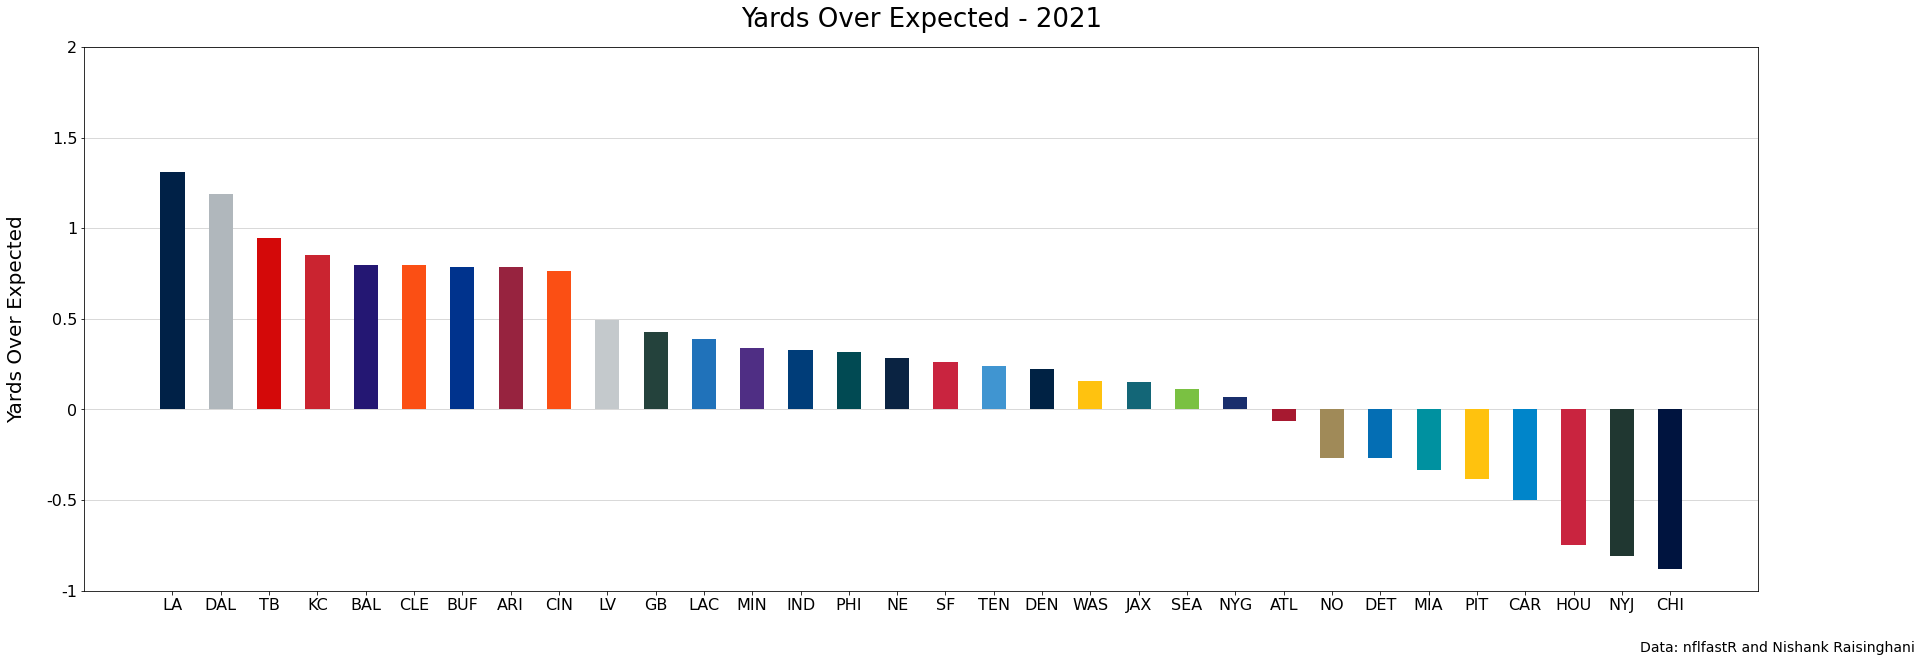

In [270]:
COLORS = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}


#Sort highest to lowest so bar chart is left to right - high to low
epa_data1.sort_values('yards_over_expected',ascending=False,inplace=True)

fig, ax = plt.subplots(figsize=(30,10))

#Create league average line


#Add team logos


#Add bar chart, x axis is an array from 0-31 (length of 32, one per team)
ax.bar(np.arange(0,32), epa_data1['yards_over_expected'], color=epa_data1.color, width=.5)
    
#Add a grid across the y-axis
ax.grid(zorder=0,alpha=.6,axis='y')
ax.set_axisbelow(True)
ax.set_xticks(np.arange(0,32))
#Add team abbreviations as x tick labels
ax.set_xticklabels(epa_data1.index,fontsize=16)

#Start y-axis at .3 (30%) to eliminate wasted space
ax.set_ylim(-1,2)
ax.set_yticks([-1,-0.5,0,0.5,1,1.5,2])
ax.set_yticklabels([-1,-0.5,0,0.5,1,1.5,2],fontsize=16)

ax.set_ylabel('Yards Over Expected', fontsize=20, labelpad=20)
ax.set_title('Yards Over Expected - 2021', fontsize=26, pad=20)
plt.figtext(.845, .04, 'Data: nflfastR and Nishank Raisinghani', fontsize=14)


plt.savefig('neutral_pass_rates.png',dpi=300)